In [445]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
from sklearn import linear_model
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

%matplotlib inline

ols = linear_model.LinearRegression()
df =pd.read_csv('train_clean.csv', index_col= 0)

print(df.shape)
print(df.describe())

df.sample(5)

(1452, 201)
       LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1452.000000    1452.000000  1452.000000  1452.000000  1452.000000   
mean     70.422058   10507.276171     6.092975     5.579201  1971.116391   
std      23.796180    9989.563592     1.381289     1.113136    30.193761   
min      21.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      59.000000    7538.750000     5.000000     5.000000  1954.000000   
50%      70.000000    9478.500000     6.000000     5.000000  1972.000000   
75%      80.972348   11600.000000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea    ExterQual    ExterCond     BsmtQual  ...  \
count   1452.000000  1452.000000  1452.000000  1452.000000  1452.000000  ...   
mean    1984.775482   103.685262     3.391873     3.084022     3.486226  ...   
std       20.652466   181.066207     0.572771     0.351965     

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalBath,Bedroom/Bathroom
Id,,,,,,,,,,,,,,,,,,,,,
911,80.000000,11600,5,5,1960,1960,361.0,3,3,3,...,0,0,1,0,0,0,1,0,2,2.500000
790,85.122614,12205,6,8,1966,2007,157.0,3,3,3,...,0,0,1,0,0,0,1,0,3,1.666667
1070,60.000000,9600,5,7,1949,2003,0.0,3,3,3,...,0,0,1,0,0,0,1,0,2,1.000000
1046,59.727972,13680,3,5,1955,1955,0.0,3,3,0,...,0,0,1,0,0,0,1,0,2,2.000000
590,50.000000,9100,5,6,1930,1960,0.0,3,3,3,...,0,0,1,0,0,0,1,0,1,2.000000


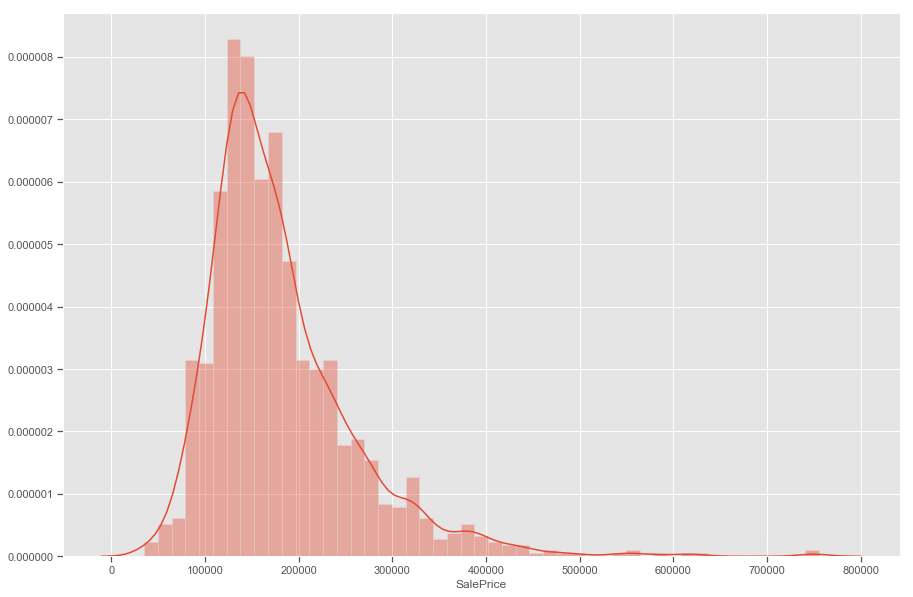

In [446]:
y = df['SalePrice']
X = df[df.columns.difference(['SalePrice'])]
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y)

In [447]:
# import matplotlib.gridspec as gridspec
# import seaborn as sns

# X_Bin = df[['CentralAir_Y','Street_Pave', 'Utilities_NoSeWa',]]
# # print(X_Bin)
# print(X_Bin.apply(pd.Series.value_counts))

# Air_0 = y[X_Bin.CentralAir_Y==0]
# Air_1 = y[X_Bin.CentralAir_Y==1]

# fig = plt.figure(figsize=(14, 6))
# gs = gridspec.GridSpec(1, 2)
# ax1 = plt.subplot(gs[0, 0])
# ax2 = plt.subplot(gs[0, 1])
# sns.boxplot(y=y, x=X_Bin.CentralAir_Y, ax = ax1)
# ylim = ax1.get_ylim()

# hist_kwargs = dict(orientation='horizontal', bins=50, ax=ax2)
# Air_0.hist(alpha=0.4, **hist_kwargs)
# Air_1.hist(alpha=0.6, **hist_kwargs)
# ax2.set_ylim((ylim[0], ylim[1]))

# for tick in ax2.yaxis.get_major_ticks():
#     tick.label1On = False
#     tick.label2On = False
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0)
# plt.show()

In [448]:
# StPave_0 = y[X_Bin.Street_Pave==0]
# StPave_1 = y[X_Bin.Street_Pave==1]

# fig = plt.figure(figsize=(14, 6))
# gs = gridspec.GridSpec(1, 2)
# ax1 = plt.subplot(gs[0, 0])
# ax2 = plt.subplot(gs[0, 1])
# sns.boxplot(y=y, x=X_Bin.Street_Pave, ax = ax1)
# ylim = ax1.get_ylim()

# hist_kwargs = dict(orientation='horizontal', bins=50, ax=ax2)
# Air_0.hist(alpha=0.4, **hist_kwargs)
# Air_1.hist(alpha=0.6, **hist_kwargs)
# ax2.set_ylim((ylim[0], ylim[1]))

# for tick in ax2.yaxis.get_major_ticks():
#     tick.label1On = False
#     tick.label2On = False
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0)
# plt.show()

In [449]:
# StPave_0 = y[X_Bin.Utilities_NoSeWa==0]
# StPave_1 = y[X_Bin.Utilities_NoSeWa==1]

# fig = plt.figure(figsize=(14, 6))
# gs = gridspec.GridSpec(1, 2)
# ax1 = plt.subplot(gs[0, 0])
# ax2 = plt.subplot(gs[0, 1])
# sns.boxplot(y=y, x=X_Bin.Utilities_NoSeWa, ax = ax1)
# ylim = ax1.get_ylim()

# hist_kwargs = dict(orientation='horizontal', bins=50, ax=ax2)
# Air_0.hist(alpha=0.4, **hist_kwargs)
# Air_1.hist(alpha=0.6, **hist_kwargs)
# ax2.set_ylim((ylim[0], ylim[1]))

# for tick in ax2.yaxis.get_major_ticks():
#     tick.label1On = False
#     tick.label2On = False
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0)
# plt.show()

In [450]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# X_Ord = df[['OverallQual', 'OverallCond','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1','HeatingQC',
#         'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond', 'PavedDrive','PoolQC',
#         'Fence','TotalBath']]

# for column in X_Ord.columns[0:]:  # Loop over all columns except
#     sns.set()
#     fig, ax = plt.subplots()
#     sns.set(style="ticks")
#     sns.boxplot(x=X_Ord[column], y=y, data=X_Ord)  # column is chosen here
#     sns.despine(offset=10, trim=True) 
#     fig.set_size_inches(22,14)
#     plt.show()

In [451]:
# import matplotlib.gridspec as gridspec
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# X_Num= df[['LotFrontage','LotArea', 'YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
#          'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
#          'Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','3SsnPorch','PoolArea',
#          'MoSold','YrSold','Bedroom/Bathroom','EnclosedPorch','ScreenPorch','Gar2','Shed','TenC']]

# fig = plt.figure(figsize=(14, 33))
# gs = gridspec.GridSpec(11, 2)

# for i in range(33):
#     ax1 = plt.subplot(gs[i, 0])
#     ax2 = plt.subplot(gs[i, 1])    
#     sns.regplot(y, X_Num.iloc[:, i], ax=ax1)
#     ax1.set_title('')
#     ax1.set_xlabel('')
#     ylim = ax1.get_ylim()   
#     X_Num[X_Num.columns[i]].hist(bins=50, ax=ax2, orientation='horizontal')    
#     ax2.set_ylim((ylim[0], ylim[1]))
#     ax2.set_xlabel('')
#     ax2.set_xlim((0, 200))
#     for tick in ax2.yaxis.get_major_ticks():
#         tick.label1On = False
#         tick.label2On = True
#     if i != 0:
#         ax1.set_xticklabels([''])
#         ax2.set_xticklabels([''])
#     else:
#         ax1.set_title('Sale Price \n', size=15)
#         ax2.set_title('count \n', size=15)
#         for tick in ax1.xaxis.get_major_ticks():
#             tick.label1On = False
#             tick.label2On = True
#         for tick in ax2.xaxis.get_major_ticks():
#             tick.label1On = False
#             tick.label2On = True
# plt.tight_layout(pad=0, w_pad=0, h_pad=0)
# plt.show()

In [452]:
# X_Cat = df[[
# 'SaleType_ConLw','SaleType_New','SaleType_Oth','SaleType_WD','SaleType_CWD','SaleType_Con','SaleType_ConLD', 
# 'SaleType_ConLI',
    
# 'SaleCondition_AdjLand','SaleCondition_Normal','SaleCondition_Alloca','SaleCondition_Family',
# 'SaleCondition_Partial',
    
# 'GarageType_No','GarageType_Attchd','GarageType_Basment','GarageType_BuiltIn','GarageType_CarPort',
# 'GarageType_Detchd',
    
# 'Electrical_FuseP','Electrical_Mix','Electrical_SBrkr', 'Electrical_FuseF',
    
# 'BsmtFinType2_Rec','BsmtFinType2_Unf','BsmtFinType2_BLQ','BsmtFinType2_GLQ','BsmtFinType2_LwQ',
    
# 'Heating_GasA','Heating_GasW','Heating_Grav','Heating_OthW','Heating_Wall',
    
# 'Foundation_Stone','Foundation_Wood','Foundation_CBlock','Foundation_PConc','Foundation_Slab',
    
# 'BsmtExposure_Gd','BsmtExposure_Mn','BsmtExposure_NoBsmt','BsmtExposure_NoExposure',
            
# 'Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','Exterior2nd_Wd Shng','Exterior2nd_CBlock','Exterior2nd_CmentBd',
# 'Exterior2nd_HdBoard','Exterior2nd_ImStucc','Exterior2nd_MetalSd','Exterior2nd_Other','Exterior2nd_Plywood',
# 'Exterior2nd_Stone','Exterior2nd_Stucco','Exterior2nd_AsphShn','Exterior2nd_Brk Cmn','Exterior2nd_BrkFace',
            
# 'MasVnrType_BrkFace','MasVnrType_None','MasVnrType_Stone',
    
# 'Exterior1st_Plywood','Exterior1st_Stone','Exterior1st_Stucco','Exterior1st_VinylSd','Exterior1st_Wd Sdng',
# 'Exterior1st_WdShing','Exterior1st_AsphShn','Exterior1st_BrkComm','Exterior1st_BrkFace','Exterior1st_CBlock',
# 'Exterior1st_CemntBd','Exterior1st_HdBoard','Exterior1st_ImStucc','Exterior1st_MetalSd',
    
# 'RoofMatl_WdShngl','RoofMatl_CompShg','RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','RoofMatl_Tar&Grv',
# 'RoofMatl_WdShake',
    
# 'RoofStyle_Hip','RoofStyle_Mansard','RoofStyle_Shed','RoofStyle_Gambrel',
    
# 'HouseStyle_1.5Unf','HouseStyle_1Story','HouseStyle_2.5Fin','HouseStyle_2.5Unf','HouseStyle_2Story',
# 'HouseStyle_SFoyer','HouseStyle_SLvl','RoofStyle_Gable',
    
# 'Condition1_PosN','Condition1_RRAe','Condition1_RRAn','Condition1_RRNe','Condition1_RRNn','Condition1_Feedr',
# 'Condition1_Norm','Condition1_PosA',
            
    
# 'BldgType_2fmCon','BldgType_Duplex','BldgType_Twnhs','BldgType_TwnhsE',
    
# 'Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr',
# 'Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_IDOTRR','Neighborhood_MeadowV',
# 'Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge',
# 'Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW',
# 'Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker',
    
# 'LandContour_Low','LandContour_Lvl','LandContour_HLS',

# 'LotConfig_CulDSac','LotConfig_FR2','LotConfig_FR3','LotConfig_Inside',
            
# 'LandSlope_Mod','LandSlope_Sev',
    
# 'MSZoning_RL','MSZoning_RM','MSZoning_FV','MSZoning_RH',

# 'Alley_No','Alley_Pave',
            
# 'LotShape_IR2','LotShape_IR3','LotShape_Reg']]

# #X_Cat.apply(pd.Series.value_counts)


In [453]:
# df = df.drop(['SalePrice','LotShape_IR2','Alley_No','MSZoning_RL','LandSlope_Mod','LotConfig_CulDSac','SaleType_ConLw','LandContour_Low',
#             'Neighborhood_Blueste','BldgType_2fmCon','Condition1_PosN','HouseStyle_1.5Unf','RoofStyle_Hip','RoofMatl_WdShngl',
#             'Exterior1st_Plywood','MasVnrType_BrkFace','Exterior2nd_VinylSd','BsmtExposure_Gd','Foundation_Stone',
#             'Heating_GasA','BsmtFinType2_Rec','Electrical_FuseP','GarageType_No','SaleCondition_AdjLand'], axis = 1)

In [454]:
df.sample(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalBath,Bedroom/Bathroom
Id,,,,,,,,,,,,,,,,,,,,,
472,92.0,11952,7,6,1977,1977,0.0,3,3,4,...,0,0,1,0,0,0,1,0,3,1.0
146,24.0,2522,6,5,2004,2006,50.0,4,3,4,...,0,0,1,0,0,0,1,0,2,1.5
398,69.0,7590,5,5,1962,1962,288.0,3,3,3,...,0,0,1,0,0,0,1,0,2,2.0
1419,71.0,9204,5,5,1963,1963,0.0,3,3,3,...,0,0,0,0,0,0,1,0,3,1.0
1270,78.0,11344,5,5,1958,1958,180.0,3,3,3,...,0,0,1,0,0,0,1,0,2,1.5


In [455]:
from sklearn.linear_model import LinearRegression 

# print(pd.DataFrame(df.columns, columns=['Column_Name']))

X_train, X_test, y_train, y_test = train_test_split(df.values[:,:-1], df.values[:,-1:],test_size=0.25,
random_state=42)

ols = LinearRegression()
ols.fit(X_train, y_train)

y_train = y_train.ravel()
y_test = y_test.ravel()

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)
print("R^2 for train set: %f" %ols.score(X_train, y_train))
print('-'*50)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))


Training dataset shape: (1089, 200) (1089,)
Testing dataset shape: (363, 200) (363,)
R^2 for train set: 0.881258
--------------------------------------------------
R^2 for test  set: 0.807732


In [456]:
# # Build RF classifier to use in feature selection
# clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# # Build step forward feature selection
# sfs1 = sfs(clf, k_features=5, forward=True, floating=False, verbose=2, scoring='accuracy', cv=5)

# #Perform SFFS
# sfs1 = sfs1.fit(X_train, y_train)

YearBuilt
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BedroomAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
PoolArea
Bedroom/Bathroom


Text(0.5, 1.0, '$R^2$ of a continuous feature against the other features')

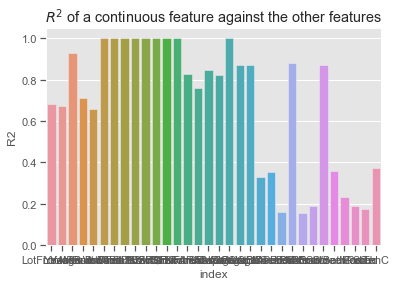

In [457]:
from sklearn.metrics import r2_score

scores = {}
ols2 = LinearRegression()

for feature_name in X_Num:
    df2 = df.copy()
    feature = df2[feature_name].copy()
    df2.drop(feature_name, axis=1, inplace=True)
    ols2.fit(df2, feature)
    scores[feature_name] = ols2.score(df2, feature)
    if scores[feature_name]>0.8:
        print(feature_name)

sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of a continuous feature against the other features')

In [487]:
colname = df.columns
pd.DataFrame(colname)

,0
0,LotFrontage
1,LotArea
2,OverallQual
3,OverallCond
4,YearBuilt
5,YearRemodAdd
6,MasVnrArea
7,ExterQual
8,ExterCond
9,BsmtQual


In [459]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     34.63
Date:                Mon, 11 Nov 2019   Prob (F-statistic):          1.63e-312
Time:                        16:38:56   Log-Likelihood:                 64.570
No. Observations:                1089   AIC:                             256.9
Df Residuals:                     896   BIC:                             1221.
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6260     11.062     -0.147      0.8

In [460]:
ans.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-1.6260,11.062,-0.147,0.883,-23.337,20.085
x1,0.0004,0.001,0.620,0.536,-0.001,0.002
x2,2.768e-06,1.29e-06,2.145,0.032,2.35e-07,5.3e-06
x3,-0.0105,0.013,-0.795,0.427,-0.037,0.015
x4,-0.0185,0.011,-1.669,0.096,-0.040,0.003
x5,4.694e-05,0.001,0.048,0.961,-0.002,0.002
x6,-0.0011,0.001,-1.542,0.123,-0.002,0.000
x7,-2.234e-05,7.52e-05,-0.297,0.766,-0.000,0.000
x8,0.0446,0.027,1.624,0.105,-0.009,0.099
x9,-0.0370,0.027,-1.369,0.171,-0.090,0.016


In [476]:
table = pd.DataFrame(ans.summary().tables[1].data[1:])
table.columns = ['name','coef','std err','t value','p value','2.5% confidence','97.5% confidence']
table = table.astype({'name':str,'coef':float,'std err':float, 't value':float, 'p value':float,'2.5% confidence':float, '97.5% confidence':float})
table[table['p value']<0.05] # those coefficients with 0 lying outside their CIs

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence
2,x2,2.768000e-06,1.290000e-06,2.145,0.032,2.350000e-07,0.000005
15,x15,-9.004000e-05,3.300000e-05,-2.727,0.007,-0.000000e+00,-0.000025
22,x22,4.659000e-01,1.700000e-02,27.020,0.000,4.320000e-01,0.500000
46,x46,8.185000e-07,3.350000e-07,2.444,0.015,1.610000e-07,0.000001
57,x57,-1.346000e-01,5.500000e-02,-2.446,0.015,-2.430000e-01,-0.027000
58,x58,-2.213000e-01,1.070000e-01,-2.065,0.039,-4.320000e-01,-0.011000
59,x59,-4.770000e-02,2.100000e-02,-2.319,0.021,-8.800000e-02,-0.007000
102,x102,-1.683000e-01,7.700000e-02,-2.196,0.028,-3.190000e-01,-0.018000
111,x111,-1.633000e-01,8.000000e-02,-2.042,0.041,-3.200000e-01,-0.006000
130,x130,4.340000e-01,1.880000e-01,2.308,0.021,6.500000e-02,0.803000


In [462]:
table[table['p value']>=0.05] # those coefficients with 0 lying in their CIs

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence
0,const,-1.626000,11.062000,-0.147,0.883,-23.337000,20.085000
1,x1,0.000400,0.001000,0.620,0.536,-0.001000,0.002000
3,x3,-0.010500,0.013000,-0.795,0.427,-0.037000,0.015000
4,x4,-0.018500,0.011000,-1.669,0.096,-0.040000,0.003000
5,x5,0.000047,0.001000,0.048,0.961,-0.002000,0.002000
6,x6,-0.001100,0.001000,-1.542,0.123,-0.002000,0.000000
7,x7,-0.000022,0.000075,-0.297,0.766,-0.000000,0.000000
8,x8,0.044600,0.027000,1.624,0.105,-0.009000,0.099000
9,x9,-0.037000,0.027000,-1.369,0.171,-0.090000,0.016000
10,x10,0.015900,0.023000,0.694,0.488,-0.029000,0.061000


In [463]:
# Normalize

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler 

scaleType = 'standard'
if scaleType not in ['standard', 'minmax', 'maxabs']: 
           raise ValueError('%s is not a valid choice' %(scaleType))
if scaleType == 'standard':
      scaler = StandardScaler()
elif scaleType == 'minmax':
      scaler = MinMaxScaler()
elif scaleType == 'maxabs':
      scaler = MaxAbsScaler()

# Fix the scale model using the train set
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_add_const = sm.add_constant(X_train_scaled)
ols = sm.OLS(y_train, X_add_const)
answer = ols.fit()
print(answer.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     34.63
Date:                Mon, 11 Nov 2019   Prob (F-statistic):          1.63e-312
Time:                        16:38:57   Log-Likelihood:                 64.570
No. Observations:                1089   AIC:                             256.9
Df Residuals:                     896   BIC:                             1221.
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3645      0.008    179.113      0.0

In [464]:
answer.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,1.3645,0.008,179.113,0.000,1.350,1.379
x1,0.0092,0.015,0.620,0.536,-0.020,0.038
x2,0.0311,0.015,2.145,0.032,0.003,0.060
x3,-0.0145,0.018,-0.795,0.427,-0.050,0.021
x4,-0.0206,0.012,-1.669,0.096,-0.045,0.004
x5,0.0014,0.029,0.048,0.961,-0.056,0.058
x6,-0.0225,0.015,-1.542,0.123,-0.051,0.006
x7,-0.0040,0.014,-0.297,0.766,-0.031,0.023
x8,0.0251,0.015,1.624,0.105,-0.005,0.055
x9,-0.0130,0.010,-1.369,0.171,-0.032,0.006


In [465]:
table = pd.DataFrame(answer.summary().tables[1].data[1:])
table.columns = ['name','coef','std err','t value','p value','2.5% confidence','97.5% confidence']
table = table.astype({'name':str,'coef':float,'std err':float, 't value':float, 'p value':float,'2.5% confidence':float, '97.5% confidence':float})
table[table['p value']<0.05]  # those coefficients with 0 lying outside their CIs

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence
0,const,1.3645,0.008,179.113,0.000,1.350,1.379
2,x2,0.0311,0.015,2.145,0.032,0.003,0.060
13,x13,0.0348,0.013,2.640,0.008,0.009,0.061
15,x15,-0.0368,0.011,-3.329,0.001,-0.058,-0.015
22,x22,0.3875,0.014,27.020,0.000,0.359,0.416
46,x46,0.0649,0.027,2.444,0.015,0.013,0.117
57,x57,-0.0220,0.009,-2.446,0.015,-0.040,-0.004
58,x58,-0.0200,0.010,-2.065,0.039,-0.039,-0.001
59,x59,-0.0230,0.010,-2.319,0.021,-0.042,-0.004
102,x102,-0.0247,0.011,-2.196,0.028,-0.047,-0.003


Most significant 17 features with p-value<0.05 before normalization 

OverallQual, TotalBsmtSF, KitchenAbvGr, Gar2, LotShape_IR3, LotShape_Reg, LandContour_HLS, BldgType_Duplex,
HouseStyle_SLvl, Exterior1st_ImStucc, Exterior1st_Stone, Exterior2nd_ImStucc, Exterior2nd_Stone, SaleCondition_Family, SaleCondition_Normal, SaleCondition_Partial, Bedroom/Bathroom Ratio